## Project Name: Hand-Written digits Classification
Here we are using the simple neural network algorithm to classify the hand written digits

### Calling the common libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

### importing the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# lets see the length of the training and the testing dataset
print(f'''
Training Dataset: {len(X_train)}
Testing Dataset: {len(X_test)}
''')


Training Dataset: 60000
Testing Dataset: 10000



In [4]:
# single sample dimension
print(f'dimension of a single sample: {X_train[0].shape}')

dimension of a single sample: (28, 28)


### Getting idea about the dataset

In [5]:
# showing how the actual sample elements looks like
X_train[0] # numerical or array presentation

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

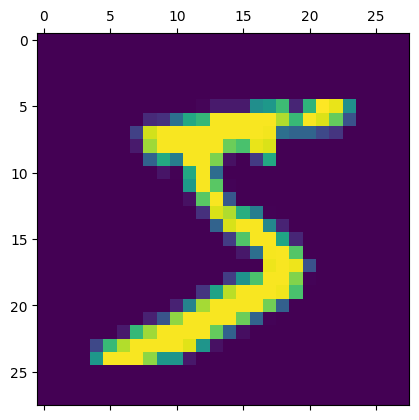

In [6]:
plt.matshow(X_train[0]) # image or actual presentaion

In [7]:
y_train[0] # value

5

In [8]:
# scaling down the values between 0 to 1
X_train = X_train/255
X_test = X_test/255

In [9]:
# now we will flatten our dataset. which means for example there are a total of 60000 elements in  the training dataset. now
# each of these 60000 elements is a 28x28 array. by flatting we mean to convert these 28x28 (2d)array into a 1d array.
X_train_flatten = X_train.reshape(len(X_train),28*28) 
X_train_flatten.shape

(60000, 784)

In [10]:
# similar covertion is to be done in case of X_test also
X_test_flatten = X_test.reshape(len(X_test),28*28) 
X_test_flatten.shape

(10000, 784)

### Model Building

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid' )
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 2ms/step - loss: 0.4711 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9256


In [12]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2721 - accuracy: 0.9251


[0.2720588743686676, 0.9251000285148621]

### Prediction

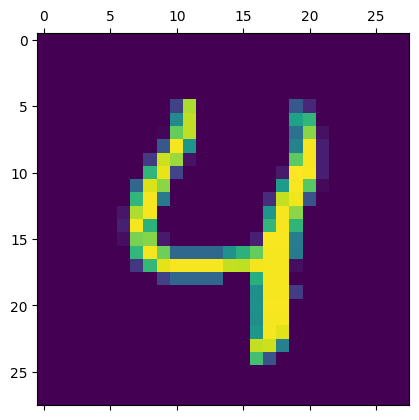

In [13]:
# let's what is actually the first images is 
plt.matshow(X_test[4])

# its a 7

In [14]:
# let's see what is the prediction we get
y_pred = model.predict(X_test_flatten[4].reshape(1,784))
y_pred
# observe that these y_pred gives the similarity score of the input to each of the levels of the output. since here the output 
# are only digits therefore the index of the most similar level will be the value of prediction 
np.argmax(y_pred)
# based on this idea lets rebuild the prediction

1/1 [==============================] - 0s 257ms/step


4

In [15]:
def predict(image):
    image_flatten = image.reshape(1,784)
    predictions = model.predict(image_flatten)
    return np.argmax(predictions)

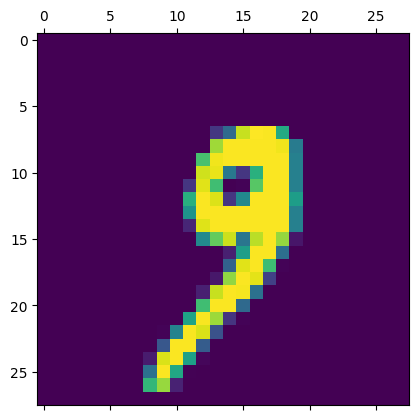

In [16]:
plt.matshow(X_test[1000])

In [17]:
predict(X_test[1000])

1/1 [==============================] - 0s 25ms/step


9

### Model Performance

In [18]:
y_pred = [np.argmax(i) for i in  model.predict(X_test_flatten)]
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
confusion_matrix

313/313 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1120,    2,    2,    0,    1,    4,    2,    4,    0],
       [   9,   14,  924,   15,    8,    3,   12,   11,   34,    2],
       [   4,    0,   21,  925,    0,   21,    2,   12,   20,    5],
       [   2,    2,    6,    2,  918,    0,    9,    5,   10,   28],
       [  11,    3,    3,   35,   10,  770,   18,    6,   30,    6],
       [  15,    3,    8,    1,    7,    7,  914,    2,    1,    0],
       [   2,   13,   22,    7,    7,    1,    0,  952,    1,   23],
       [  11,   13,    8,   22,    9,   24,   10,   12,  860,    5],
       [  12,    8,    1,   13,   32,    5,    0,   28,    8,  902]])>

In [19]:
import seaborn as sns

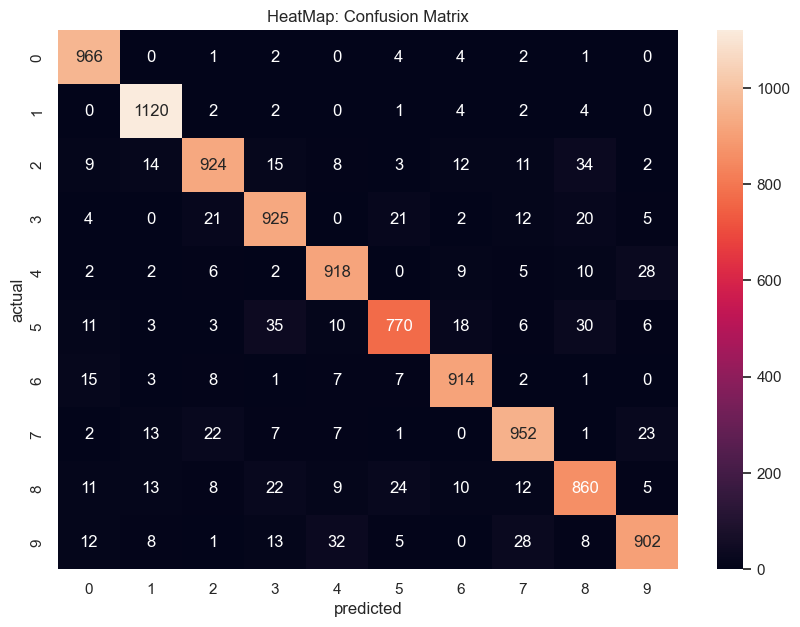

In [20]:
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title('HeatMap: Confusion Matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()